làm hàm kiểm tra đối xứng với chênh lệch không quá 10% def kiem_tra_doi_xung (mode, mean, median)
ví vụ cho dataFrame sau đó tính mode, mean, median
mode = 0.755
mean = 0.837
median = 0.832
khi chọn 1 trong 3 giá trị thì chọn giá trị điền vào làm sao cho các giá trị mode, mean, median ít có sự chênh lệch so với chưa điền nhất.

**Bài tập: chọn cách điền khuyết bằng mode, mean, median bằng phương pháp luận**

In [1]:
import numpy as np
from fontTools.cffLib import calcOffSize

path='https://raw.githubusercontent.com/datasethub/ds105/master/EDA_automobile.csv'
import  pandas as pd
df = pd.read_csv(path)

In [2]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470,9.038462,Medium,1,0


In [5]:
df['length'].quantile(0.5)

np.float64(0.832292167)

In [6]:
df['length'].describe()

count    201.000000
mean       0.837102
std        0.059213
min        0.678039
25%        0.801538
50%        0.832292
75%        0.881788
max        1.000000
Name: length, dtype: float64

In [7]:
df['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [8]:
df['price'].quantile(0.5)

np.float64(10295.0)

<Axes: >

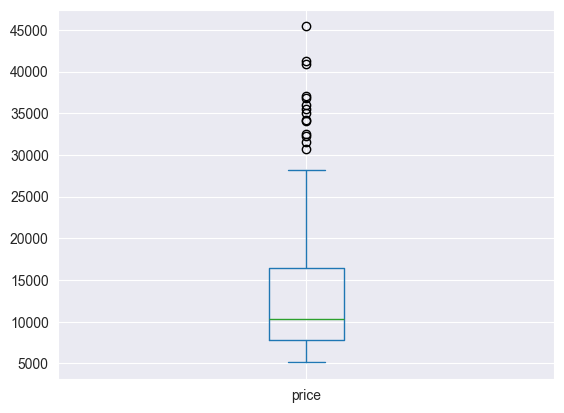

In [10]:
df['price'].plot.box()

<Axes: xlabel='drive-wheels', ylabel='price'>

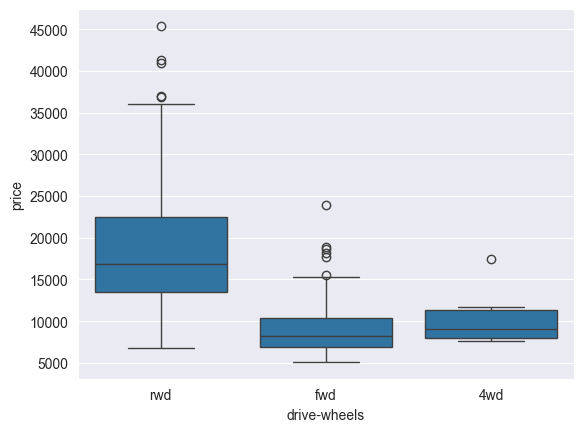

In [11]:
import seaborn as sns
sns.boxplot(x='drive-wheels',y='price',data=df)

In [ ]:
#bài tập => vẽ bằng boxplot

In [12]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
data = df['price'][(df['price']<Q1-1.5*IQR)|(df['price']>Q3+1.5*IQR)]
print(data)

14     30760
15     41315
16     36880
44     32250
45     35550
46     36000
67     31600
68     34184
69     35056
70     40960
71     45400
123    32528
124    34028
125    37028
Name: price, dtype: int64


<Axes: >

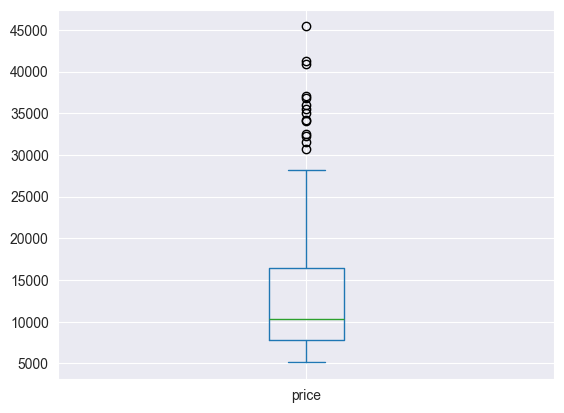

In [15]:
df['price'].plot(kind='box')

In [16]:
df['price'].skew() # skewness > 0  lệch phải; skewness < 0 lệch trái; =0 không lệch

np.float64(1.8096753390980749)

<Axes: ylabel='Density'>

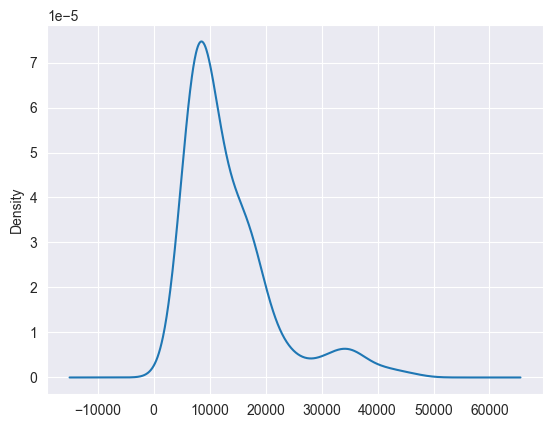

In [17]:
df['price'].plot(kind='density') #đường ước lượng

In [18]:
df['length'].skew()

np.float64(0.15444634976972002)

<Axes: ylabel='Density'>

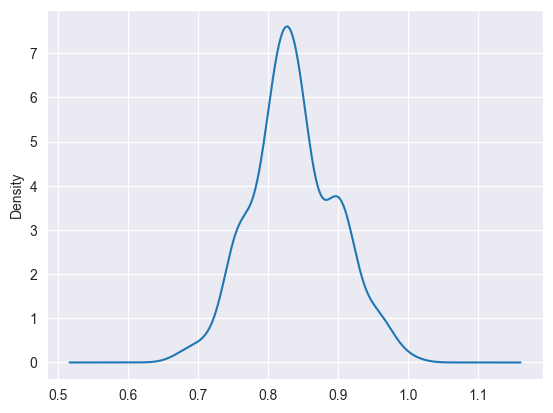

In [25]:
df['length'].plot(kind='density')

<Axes: >

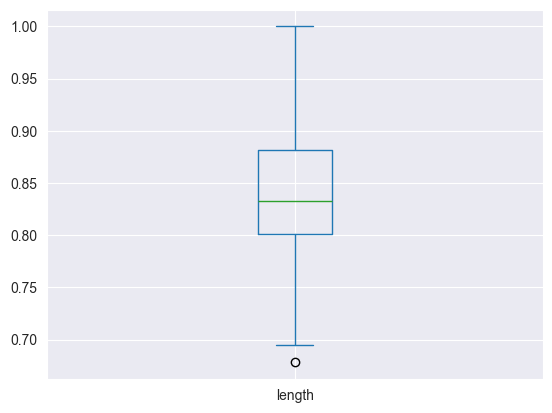

In [21]:
df['length'].plot(kind='box')

In [20]:
df['length'].kurt() # kurtosis < 0 thấp, =0 cân đối; >0: cao

np.float64(-0.06519162765593256)

In [26]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470,9.038462,Medium,1,0


In [27]:
df['engine-size']

0      130
1      130
2      152
3      109
4      136
      ... 
196    141
197    141
198    173
199    145
200    141
Name: engine-size, Length: 201, dtype: int64

In [28]:
df['engine-size'].describe()

count    201.000000
mean     126.875622
std       41.546834
min       61.000000
25%       98.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64

<Axes: >

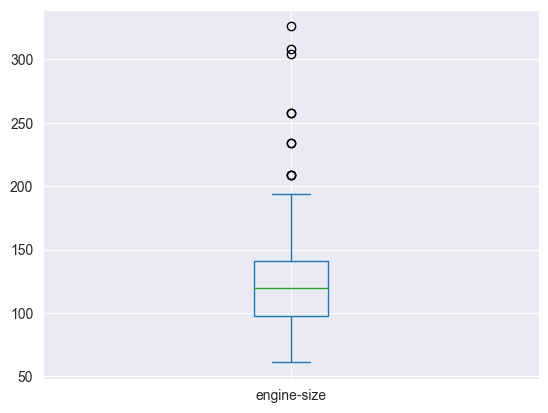

In [29]:
df['engine-size'].plot(kind='box')

<Axes: ylabel='Density'>

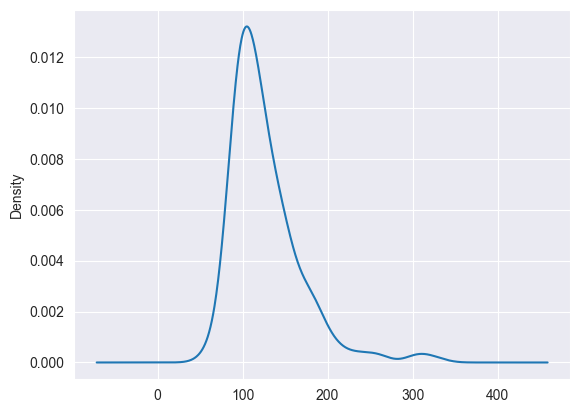

In [30]:
df['engine-size'].plot(kind='kde')

In [31]:
df['engine-size'].skew()

np.float64(1.9791441966363523)

In [32]:
df['engine-size'].kurt()

np.float64(5.497490766643349)

In [ ]:
#bài tập
# chọn các biến khác để thăm dò
# 1. Độ lệch
# 2. Độ cao
# 3. Ngoại lệ

In [6]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470,9.038462,Medium,1,0


<Axes: xlabel='drive-wheels', ylabel='price'>

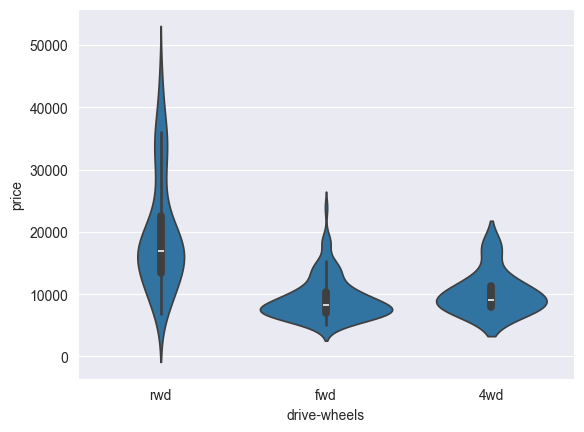

In [7]:
import seaborn as sns
sns.violinplot(data=df, x='drive-wheels', y='price')

<Axes: xlabel='engine-size', ylabel='price'>

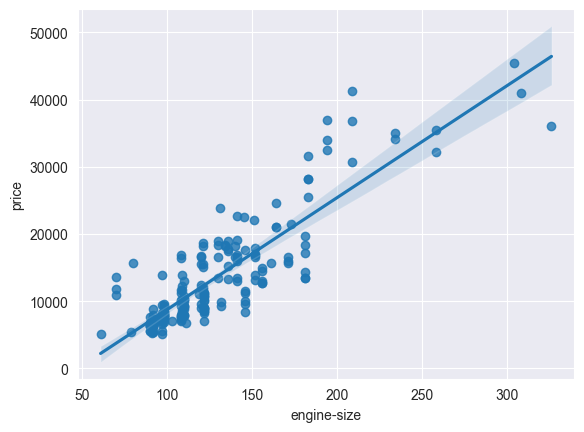

In [9]:
sns.regplot(data=df, x='engine-size', y='price') # đồ thị thể hiện tương quan giữa hai biến

In [12]:
df['engine-size'].corr(df['price']) #tính hệ số tương quan. Tương quan mạnh và đồng thuận

np.float64(0.8723351674455189)

In [14]:
df['highway-mpg'].corr(df['price'])

np.float64(-0.7046922650589534)

In [19]:
import scipy.stats as stats
corr,f = stats.pearsonr(df['engine-size'], df['price'])

In [20]:
corr

np.float64(0.8723351674455184)

In [21]:
f

np.float64(9.26549162219869e-64)

In [22]:
stats.pearsonr(df['highway-mpg'], df['price'])

PearsonRResult(statistic=np.float64(-0.7046922650589531), pvalue=np.float64(1.749547114447559e-31))

In [24]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470,9.038462,Medium,1,0


In [22]:
df_corr = df[['engine-size','highway-mpg','length','width','price']].corr()
print(df_corr)

             engine-size  highway-mpg    length     width     price
engine-size     1.000000    -0.679571  0.685025  0.729436  0.872335
highway-mpg    -0.679571     1.000000 -0.698142 -0.680635 -0.704692
length          0.685025    -0.698142  1.000000  0.857170  0.690628
width           0.729436    -0.680635  0.857170  1.000000  0.751265
price           0.872335    -0.704692  0.690628  0.751265  1.000000


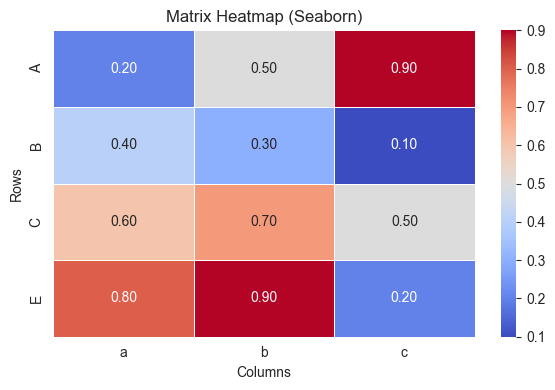

In [33]:
import matplotlib.pyplot as plt
df = pd.DataFrame(data={
'a': [0.2, 0.4, 0.6, 0.8],
'b': [0.5, 0.3, 0.7, 0.9],
'c': [0.9, 0.1, 0.5, 0.2]
}, index=['A', 'B', 'C', 'E'])
plt.figure(figsize=(6, 4))
sns.heatmap(df, annot=True, fmt=".2f", cmap="coolwarm",
xticklabels=df.columns, yticklabels=df.index,
linewidths=0.5)
plt.title("Matrix Heatmap (Seaborn)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()
plt.show()

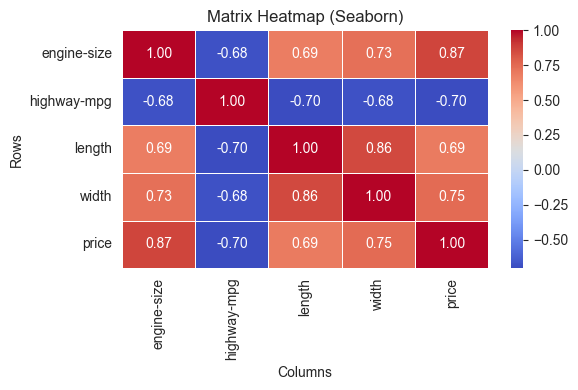

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", #chọn cmap để thực hiện các loại màu khác nhau
xticklabels=df_corr.columns, yticklabels=df_corr.index,
linewidths=0.5)
plt.title("Matrix Heatmap (Seaborn)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()
plt.show()

In [43]:
df_data = df[['drive-wheels','body-style','price']]

In [53]:
df_group= df_data.groupby(by = ['drive-wheels','body-style']).mean()

In [55]:
df_group_heatMap = df_data.groupby(by = ['drive-wheels','body-style'], as_index=False).mean()

In [61]:
result = df_group_heatMap.pivot(index='drive-wheels', columns='body-style', values='price' )

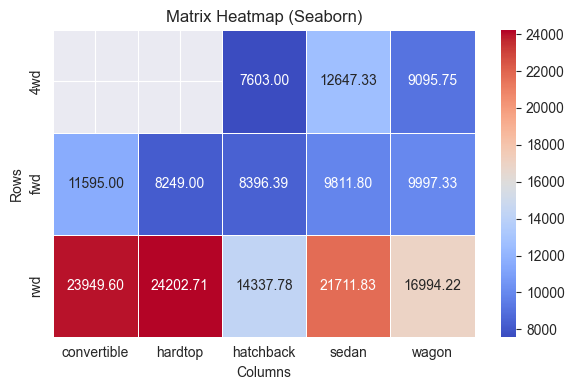

In [63]:
plt.figure(figsize=(6, 4))
sns.heatmap(result, annot=True, fmt=".2f", cmap="coolwarm",
xticklabels=result.columns, yticklabels=result.index,
linewidths=0.5)
plt.title("Matrix Heatmap (Seaborn)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()
plt.show()

Bài tập: Tìm xem trong bộ dữ liệu , xe thuộc hãng (make) nào ? Động cơ nào (engine-type) gì ? v có kiểu dáng thê nào (body-style) thì có khả năng trung bình giá xe thấp nhất

In [64]:
df_data_baitap = df[['make','engine-type','body-style','price']]

In [77]:
df_data_baitap_result = df_data_baitap.groupby(by=['make','engine-type','body-style'], as_index=False).mean()

In [82]:
df_data_baitap_result.sort_values(by='price', ascending= True)

,make,engine-type,body-style,price
5,chevrolet,l,hatchback,5151.000000
6,chevrolet,ohc,hatchback,6295.000000
7,chevrolet,ohc,sedan,6575.000000
51,subaru,ohcf,hatchback,6591.333333
15,isuzu,ohc,sedan,6785.000000
...,...,...,...,...
24,mercedes-benz,ohcv,convertible,35056.000000
17,jaguar,ohcv,sedan,36000.000000
43,porsche,ohcf,convertible,37028.000000
26,mercedes-benz,ohcv,sedan,37572.000000


Bài tập về nhà: chọn các biến kiểu số có ảnh hưởng đến giá xe (trả về tự động ra kết quả luôn, trả về danh sách các biến) (có kết hợp giữa hàm và biến lặp, dựa trên độ tương quan)

In [10]:
import math
import numpy as np
headers = df.columns
print(headers)

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')


In [14]:
header_numberic = df.select_dtypes(include=[np.number])
print(header_numberic.head())

   symboling  normalized-losses  wheel-base    length     width  height  \
0          3                122        88.6  0.811148  0.890278    48.8   
1          3                122        88.6  0.811148  0.890278    48.8   
2          1                122        94.5  0.822681  0.909722    52.4   
3          2                164        99.8  0.848630  0.919444    54.3   
4          2                164        99.4  0.848630  0.922222    54.3   

   curb-weight  engine-size  bore  stroke  compression-ratio  horsepower  \
0         2548          130  3.47    2.68                9.0       111.0   
1         2548          130  3.47    2.68                9.0       111.0   
2         2823          152  2.68    3.47                9.0       154.0   
3         2337          109  3.19    3.40               10.0       102.0   
4         2824          136  3.19    3.40                8.0       115.0   

   peak-rpm  city-mpg  highway-mpg  price  city-L/100km  diesel  gas  
0    5000.0        21

In [26]:
result = []
for i in header_numberic:
    if i =='price':
        continue
    if abs(df[f'{i}'].corr(df['price'])) >0.3:
        result.append(i)

In [27]:
result

['wheel-base',
 'length',
 'width',
 'curb-weight',
 'engine-size',
 'bore',
 'horsepower',
 'city-mpg',
 'highway-mpg',
 'city-L/100km']